<a href="https://colab.research.google.com/github/VictorGuui/Predict-The-Weather-with-Machine-Learning/blob/main/Aprendizado_da_linguagem_Python_para_dados_clim%C3%A1ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xarray as xr

In [ ]:
%matplotlib inline

In [ ]:
pip install xarray

In [ ]:
dset = xr.open_dataset("ERA5_REANALYSIS_precipitation_jun2003.nc")

In [ ]:
print(dset)
#A impressão dsetretorna ERA5_REANALYSIS_precipitation_jun2003.nc metadados:

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2003-06-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-19 19:53:24 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


Podemos ver que nosso dsetobjeto é um xarray.Dataset, que quando impresso mostra todos os metadados associados ao nosso arquivo de dados netCDF.



In [ ]:
print(dset['tp'])

<xarray.DataArray 'tp' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2003-06-01
Attributes:
    units:      m
    long_name:  Total precipitation


- Neste caso, estamos interessados ​​na variável de precipitação contida naquele conjunto de dados xarray

- A precipitação total está em unidades de “metro de água por dia”




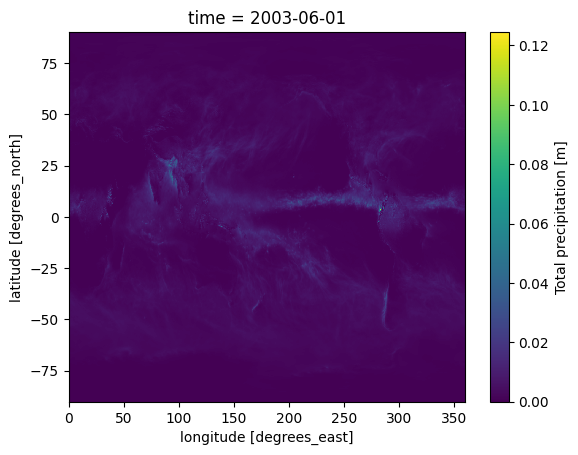

In [ ]:
dset['tp'].plot()

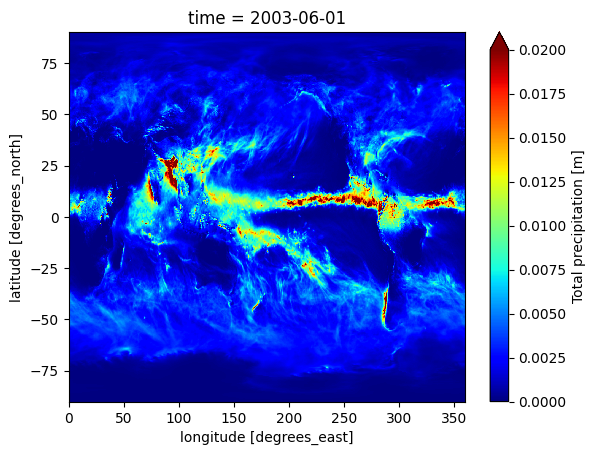

In [ ]:
dset['tp'].plot(cmap='jet', vmax=0.02)


- Podemos ver que há uma faixa ao redor do equador e em áreas especialmente na Ásia e na América do Sul com muita chuva

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 34.5 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


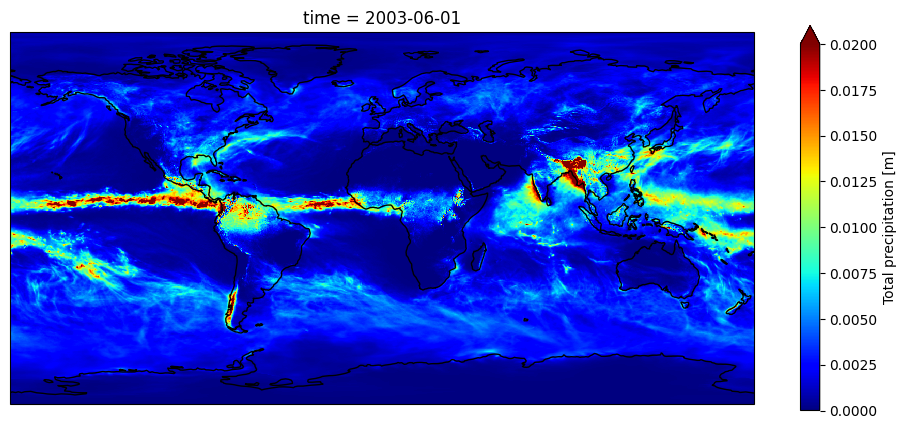

In [ ]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
dset['tp'].plot(ax=ax, vmax=0.02, cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

- Adicionei continentes em uma projeção usando cartopia

In [ ]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
variaveis = dset.data_vars


In [ ]:
print(variaveis)

Data variables:
    tp       (time, latitude, longitude) float32 ...


In [ ]:
ds = xr.open_dataset("ERA5_REANALYSIS_air_temperature_jun2003.nc")
print(ds)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2003-06-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-21 17:36:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


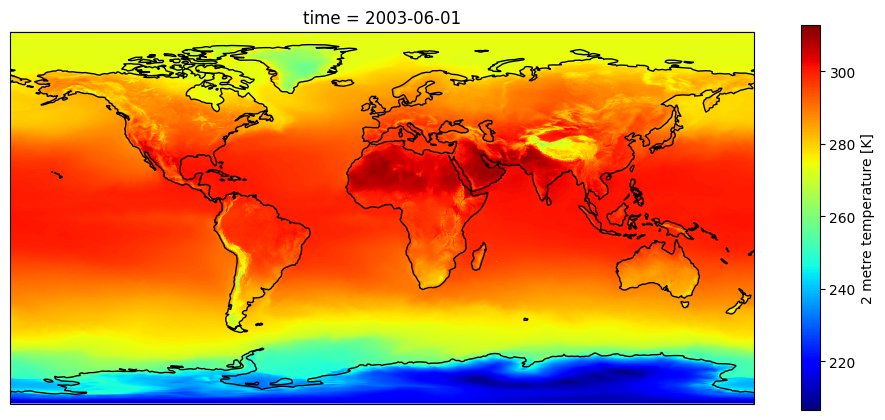

In [ ]:
fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

ds['t2m'].plot(ax=ax,  cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

- a temperatura de 2m é calculada como a temperatura a uma altura de referência (2 metros). Isto corresponde à temperatura do ar na superfície

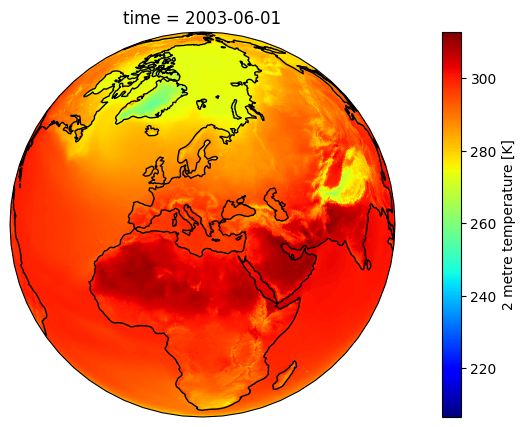

In [ ]:
fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection = ccrs.Orthographic(central_longitude=20, central_latitude=40))

ds['t2m'].plot(ax=ax,  cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

- Muitas vezes é conveniente visualizar usando uma projeção diferente dos dados originais